In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import time
import datetime

#from google.colab import drive
#drive.mount('/content/drive')

### Apple Watch data

In [2]:
import xml.etree.ElementTree as ET
import xmltodict as xd
import pandas as pd
import numpy as np

In [3]:
input_data = pd.read_csv('askar/ah_data.csv')
ah_data = input_data.copy(deep=True)

In [4]:
ah_data.head()

,date,heartrate,calories,METs
0,2021-08-13 17:04:53+03:00,88.2759,0.006941,0.000010
1,2021-08-13 20:39:14+03:00,70.6977,0.006941,0.000010
2,2021-08-14 05:16:15+03:00,51.5436,0.013974,0.000019
3,2021-08-14 07:16:27+03:00,66.4935,0.013974,0.000019
4,2021-08-14 12:39:46+03:00,97.2152,0.013974,0.000019


Метаболический эквивалент METs$ = \frac{calories}{weight}\cdot time$

In [5]:
len(set(ah_data['METs']))

141

In [6]:
len(ah_data['METs'])

1220

In [7]:
ah_data['date'] = pd.to_datetime(ah_data['date'])

ah_data['hour_sin'] = np.sin(2 * np.pi * ah_data["date"].dt.hour/24.0)
ah_data['hour_cos'] = np.cos(2 * np.pi * ah_data["date"].dt.hour/24.0)
ah_data['day_of_week_sin'] = np.sin(2 * np.pi * ah_data["date"].dt.dayofweek/7.0)
ah_data['day_of_week_cos'] = np.cos(2 * np.pi * ah_data["date"].dt.dayofweek/7.0)

ah_data = ah_data[["heartrate", "calories", "METs", "day_of_week_sin", "day_of_week_cos", "hour_sin", "hour_cos"]]
ah_data = pd.concat(
  (
    ah_data,
    ah_data.shift(1).rename(columns=lambda x: x+'_lag1'),
    ah_data.shift(2).rename(columns=lambda x: x+'_lag2'),
    ah_data.shift(3).rename(columns=lambda x: x+'_lag3'),
  ), axis=1)

ah_data.dropna(inplace=True)
ah_data

,heartrate,calories,METs,day_of_week_sin,day_of_week_cos,hour_sin,hour_cos,heartrate_lag1,calories_lag1,METs_lag1,...,day_of_week_cos_lag2,hour_sin_lag2,hour_cos_lag2,heartrate_lag3,calories_lag3,METs_lag3,day_of_week_sin_lag3,day_of_week_cos_lag3,hour_sin_lag3,hour_cos_lag3
3,66.4935,0.013974,0.000019,-0.974928,-0.222521,9.659258e-01,-2.588190e-01,51.5436,0.013974,0.000019,...,-0.900969,-8.660254e-01,5.000000e-01,88.2759,0.006941,0.000010,-0.433884,-0.900969,-9.659258e-01,-2.588190e-01
4,97.2152,0.013974,0.000019,-0.974928,-0.222521,1.224647e-16,-1.000000e+00,66.4935,0.013974,0.000019,...,-0.222521,9.659258e-01,2.588190e-01,70.6977,0.006941,0.000010,-0.433884,-0.900969,-8.660254e-01,5.000000e-01
5,109.7140,0.013974,0.000019,-0.974928,-0.222521,-1.000000e+00,-1.836970e-16,97.2152,0.013974,0.000019,...,-0.222521,9.659258e-01,-2.588190e-01,51.5436,0.013974,0.000019,-0.974928,-0.222521,9.659258e-01,2.588190e-01
6,120.9450,0.013974,0.000019,-0.974928,-0.222521,-8.660254e-01,5.000000e-01,109.7140,0.013974,0.000019,...,-0.222521,1.224647e-16,-1.000000e+00,66.4935,0.013974,0.000019,-0.974928,-0.222521,9.659258e-01,-2.588190e-01
7,90.6203,0.013974,0.000019,-0.974928,-0.222521,-2.588190e-01,9.659258e-01,120.9450,0.013974,0.000019,...,-0.222521,-1.000000e+00,-1.836970e-16,97.2152,0.013974,0.000019,-0.974928,-0.222521,1.224647e-16,-1.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215,69.5023,0.018089,0.000025,0.433884,-0.900969,-8.660254e-01,5.000000e-01,85.8101,0.018089,0.000025,...,-0.900969,-7.071068e-01,-7.071068e-01,57.1004,0.018089,0.000025,0.433884,-0.900969,2.588190e-01,-9.659258e-01
1216,69.3457,0.018089,0.000025,0.433884,-0.900969,-5.000000e-01,8.660254e-01,69.5023,0.018089,0.000025,...,-0.900969,-1.000000e+00,-1.836970e-16,95.5364,0.018089,0.000025,0.433884,-0.900969,-7.071068e-01,-7.071068e-01
1217,66.9284,0.018089,0.000025,0.433884,-0.900969,-2.588190e-01,9.659258e-01,69.3457,0.018089,0.000025,...,-0.900969,-8.660254e-01,5.000000e-01,85.8101,0.018089,0.000025,0.433884,-0.900969,-1.000000e+00,-1.836970e-16
1218,99.0968,0.014533,0.000020,-0.433884,-0.900969,8.660254e-01,-5.000000e-01,66.9284,0.018089,0.000025,...,-0.900969,-5.000000e-01,8.660254e-01,69.5023,0.018089,0.000025,0.433884,-0.900969,-8.660254e-01,5.000000e-01


In [8]:
# lst = list(range(3,len(ah_data)+3))
# Id = pd.DataFrame(lst, index=lst)
# Id

In [9]:
# ah_data.insert(0, "Id", Id)
# ah_data

### Prepaing dataset

In [10]:
import tensorflow as tf

In [11]:
from keras import backend as K

In [12]:
def date2timesamp(date):
    return time.mktime(datetime.datetime.strptime(date, "%Y-%m-%d").timetuple()) #%Y-%m-%d %H:%M:%S

def resample(df, column='Value'):
    df['Time'] =  pd.to_datetime(df['Time'])
    df.set_index(['Time'], inplace=True)
    df[column] = df[column].resample('1T').mean()
    df.dropna(inplace=True)
    return df

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [13]:
dataset = pd.read_csv('askar/new_clusters_12.csv')
dataset["date"] = pd.to_datetime(dataset["date"])

dataset['hour_sin'] = np.sin(2 * np.pi * dataset["date"].dt.hour/24.0)
dataset['hour_cos'] = np.cos(2 * np.pi * dataset["date"].dt.hour/24.0)
dataset['day_of_week_sin'] = np.sin(2 * np.pi * dataset["date"].dt.dayofweek/7.0)
dataset['day_of_week_cos'] = np.cos(2 * np.pi * dataset["date"].dt.dayofweek/7.0)

In [14]:
dataset.rename(columns = {'Unnamed: 0' : 'Id'}, inplace = True) 
dataset[:2]

,Id,heartrate,date,calories,METs,cluster,hour_sin,hour_cos,day_of_week_sin,day_of_week_cos
0,0,70,2016-04-17 05:30:20,0.834023,1,3.0,0.965926,0.258819,-0.781831,0.62349
1,1,67,2016-04-17 05:30:25,0.834347,1,3.0,0.965926,0.258819,-0.781831,0.62349


In [15]:
dataset['Id']

0                0
1                1
2                2
3                3
4                4
            ...   
5457294    5457294
5457295    5457295
5457296    5457296
5457297    5457297
5457298    5457298
Name: Id, Length: 5457299, dtype: int64

<AxesSubplot:>

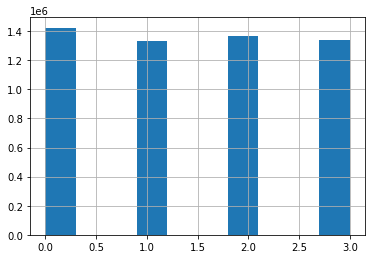

In [16]:
dataset['cluster'].hist()

In [17]:
u

NameError: name 'u' is not defined

In [ ]:
X = dataset[["Id", "heartrate", "calories", "METs", "day_of_week_sin", "day_of_week_cos", "hour_sin", "hour_cos"]]
y = dataset["cluster"]

In [ ]:
X.head()

In [ ]:
# X = pd.concat(
#   (
#     X,
#     X.groupby(level="Id").shift(1).rename(columns=lambda x: x+'_lag1'),
#     X.groupby(level="Id").shift(2).rename(columns=lambda x: x+'_lag2'),
#     X.groupby(level="Id").shift(3).rename(columns=lambda x: x+'_lag3'),
#   ), axis=1)

# Все превращает в NaN

In [ ]:
X = pd.concat((
    X,
    X.shift(periods=1).rename(columns=lambda x: x+'_lag1'),
    X.shift(periods=2).rename(columns=lambda x: x+'_lag2'),
    X.shift(periods=3).rename(columns=lambda x: x+'_lag3') 
), axis=1)

In [ ]:
X.head()

In [ ]:
X.drop(columns=['Id'], inplace=True)
X.drop(columns=['Id_lag1'], inplace=True)
X.drop(columns=['Id_lag2'], inplace=True)
X.drop(columns=['Id_lag3'], inplace=True)

In [ ]:
# X = pd.concat(
#   (
#     X,
#     X.groupby(level="Id").shift(1).rename(columns=lambda x: x+'_lag1'),
#     X.groupby(level="Id").shift(2).rename(columns=lambda x: x+'_lag2'),
#     X.groupby(level="Id").shift(3).rename(columns=lambda x: x+'_lag3'),
#   )
X['cluster'] = y
X.dropna(inplace=True)
y = X['cluster']
X.drop(columns=['cluster'], inplace=True)

In [ ]:
X.head()

In [ ]:
y.head()

### Catboost classifie test

In [ ]:
#!pip install catboost

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split

Split the data into `train`, `test` and `val` with ratio 4-to-2-to-1.

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
RANDOM_SEED = 42

X_train, X_not_train, y_train, y_not_train = train_test_split(X, 
                                                              y, 
                                                              test_size = 3/7, #represent the proportion of the dataset to include in the test split
                                                              shuffle=True,    #to shuffle the data
                                                              stratify = None, #If not None, data is split in a stratified fashion, using this as the class labels.  
                                                              random_state=RANDOM_SEED)
X_test, X_val, y_test, y_val = train_test_split(X_not_train, 
                                                y_not_train, 
                                                test_size = 1/3, 
                                                shuffle=True, 
                                                stratify= None,
                                                random_state=RANDOM_SEED)

**CatBoost** — открытая программная библиотека, разработанная компанией Яндекс и реализующая уникальный патентованный алгоритм построения моделей машинного обучения, использующий одну из оригинальных схем градиентного бустинга. Основное API для работы с библиотекой реализовано для языка Python, также существует реализация для языка программирования R.

https://catboost.ai/en/docs/concepts/python-reference_catboostclassifier

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score       # метрика  
from functools import partial

In [ ]:
cls = CatBoostClassifier(task_type="GPU") #, loss_function='Logloss')

In [ ]:
loss_function = cls.fit(X_train, y_train)

In [ ]:
f1_score = partial(f1_score, average='macro')

y_pred = cls.predict(X_train)
print("train acc: {}".format(accuracy_score(y_train, y_pred)))
print("train f1: {}".format(f1_score(y_train, y_pred)))

y_pred = cls.predict(X_test)
print("test acc: {}".format(accuracy_score(y_test, y_pred)))
print("test f1: {}".format(f1_score(y_test, y_pred)))

In [ ]:
ah_data[:2]

In [ ]:
X_train[:2]

In [ ]:
ah_pred_cb = cls.predict(ah_data)
print(pd.DataFrame(ah_pred_cb).hist())

In [ ]:
cls_coefs = cls.feature_importances_ # Return the calculated feature importances. 
cls_coefs

### TensorFlow model

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input, LSTM, Dropout, Bidirectional
from tensorflow.keras.datasets import mnist
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [ ]:
model = Sequential(
  [
    Input((4,7)),
    Bidirectional(LSTM(256, return_sequences=True, recurrent_activation='sigmoid')),
    LSTM(128, name="lstm-2"),
    Flatten(),
    Dense(4),
  ]
)

model.compile(optimizer='adam', loss = SparseCategoricalCrossentropy(from_logits=True), metrics=['acc', f1])
model.summary()

In [ ]:
x_train_tf = np.asarray(X).reshape(-1, 4, 7)
y_train_tf = np.asarray(y).reshape(-1, 1, 1)

In [ ]:
model.fit(
  x_train_tf,
  y_train_tf,
  batch_size=8192,
  validation_split=0.2,
  epochs=10
)

### Results

In [ ]:
X_test = np.asarray(X_test).reshape(-1, 4, 7)
result = model.predict(X_test, batch_size=4096)
result = result.argmax(axis=1).astype(np.float32)
f1_score(y_test, result)

In [ ]:
ah_data = np.asarray(ah_data).reshape(-1, 4, 7)
ah_result = model.predict(ah_data)
print(pd.DataFrame(ah_result)[0].hist())

# ah_result = ah_result.argmax(axis=1).astype(np.float32)
# print(pd.DataFrame(ah_result).hist())

In [ ]:
acc = (result == y_test).sum() / y_test.shape[0]
print("acc: {}".format(acc))

In [ ]:
# pd.DataFrame(y_test[result != y_test]).hist()
print(pd.DataFrame(result).hist())

In [ ]:
print(y.hist())

In [ ]:
result.max()

In [ ]:
from sklearn.metrics import confusion_matrix

# visualize the accuracy of predicted classes of potential amplitude
conf_mat = confusion_matrix(y_test, result)
print(conf_mat)

# ----------------------